In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
data=pd.read_csv("/content/Heart.csv")

In [ ]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
data.shape

(303, 15)

In [ ]:
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [ ]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
data['Age'].sort_values(ascending=False)

161    77
257    76
233    74
103    71
42     71
       ..
168    35
283    35
101    34
225    34
132    29
Name: Age, Length: 303, dtype: int64

In [ ]:
data.Age.value_counts()

58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
63     9
42     8
43     8
45     8
53     8
55     8
61     8
65     8
50     7
66     7
48     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: Age, dtype: int64

In [ ]:
data.Age=data.Age.map(lambda age: np.nan if age == '?' else int(age))

<ipython-input-11-62ee70f24edc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

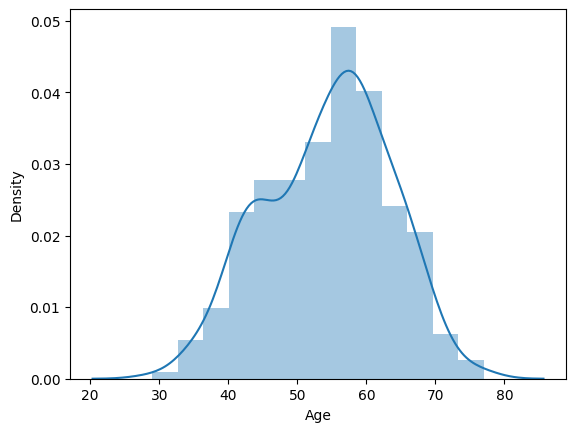

In [ ]:
sns.distplot(data["Age"])

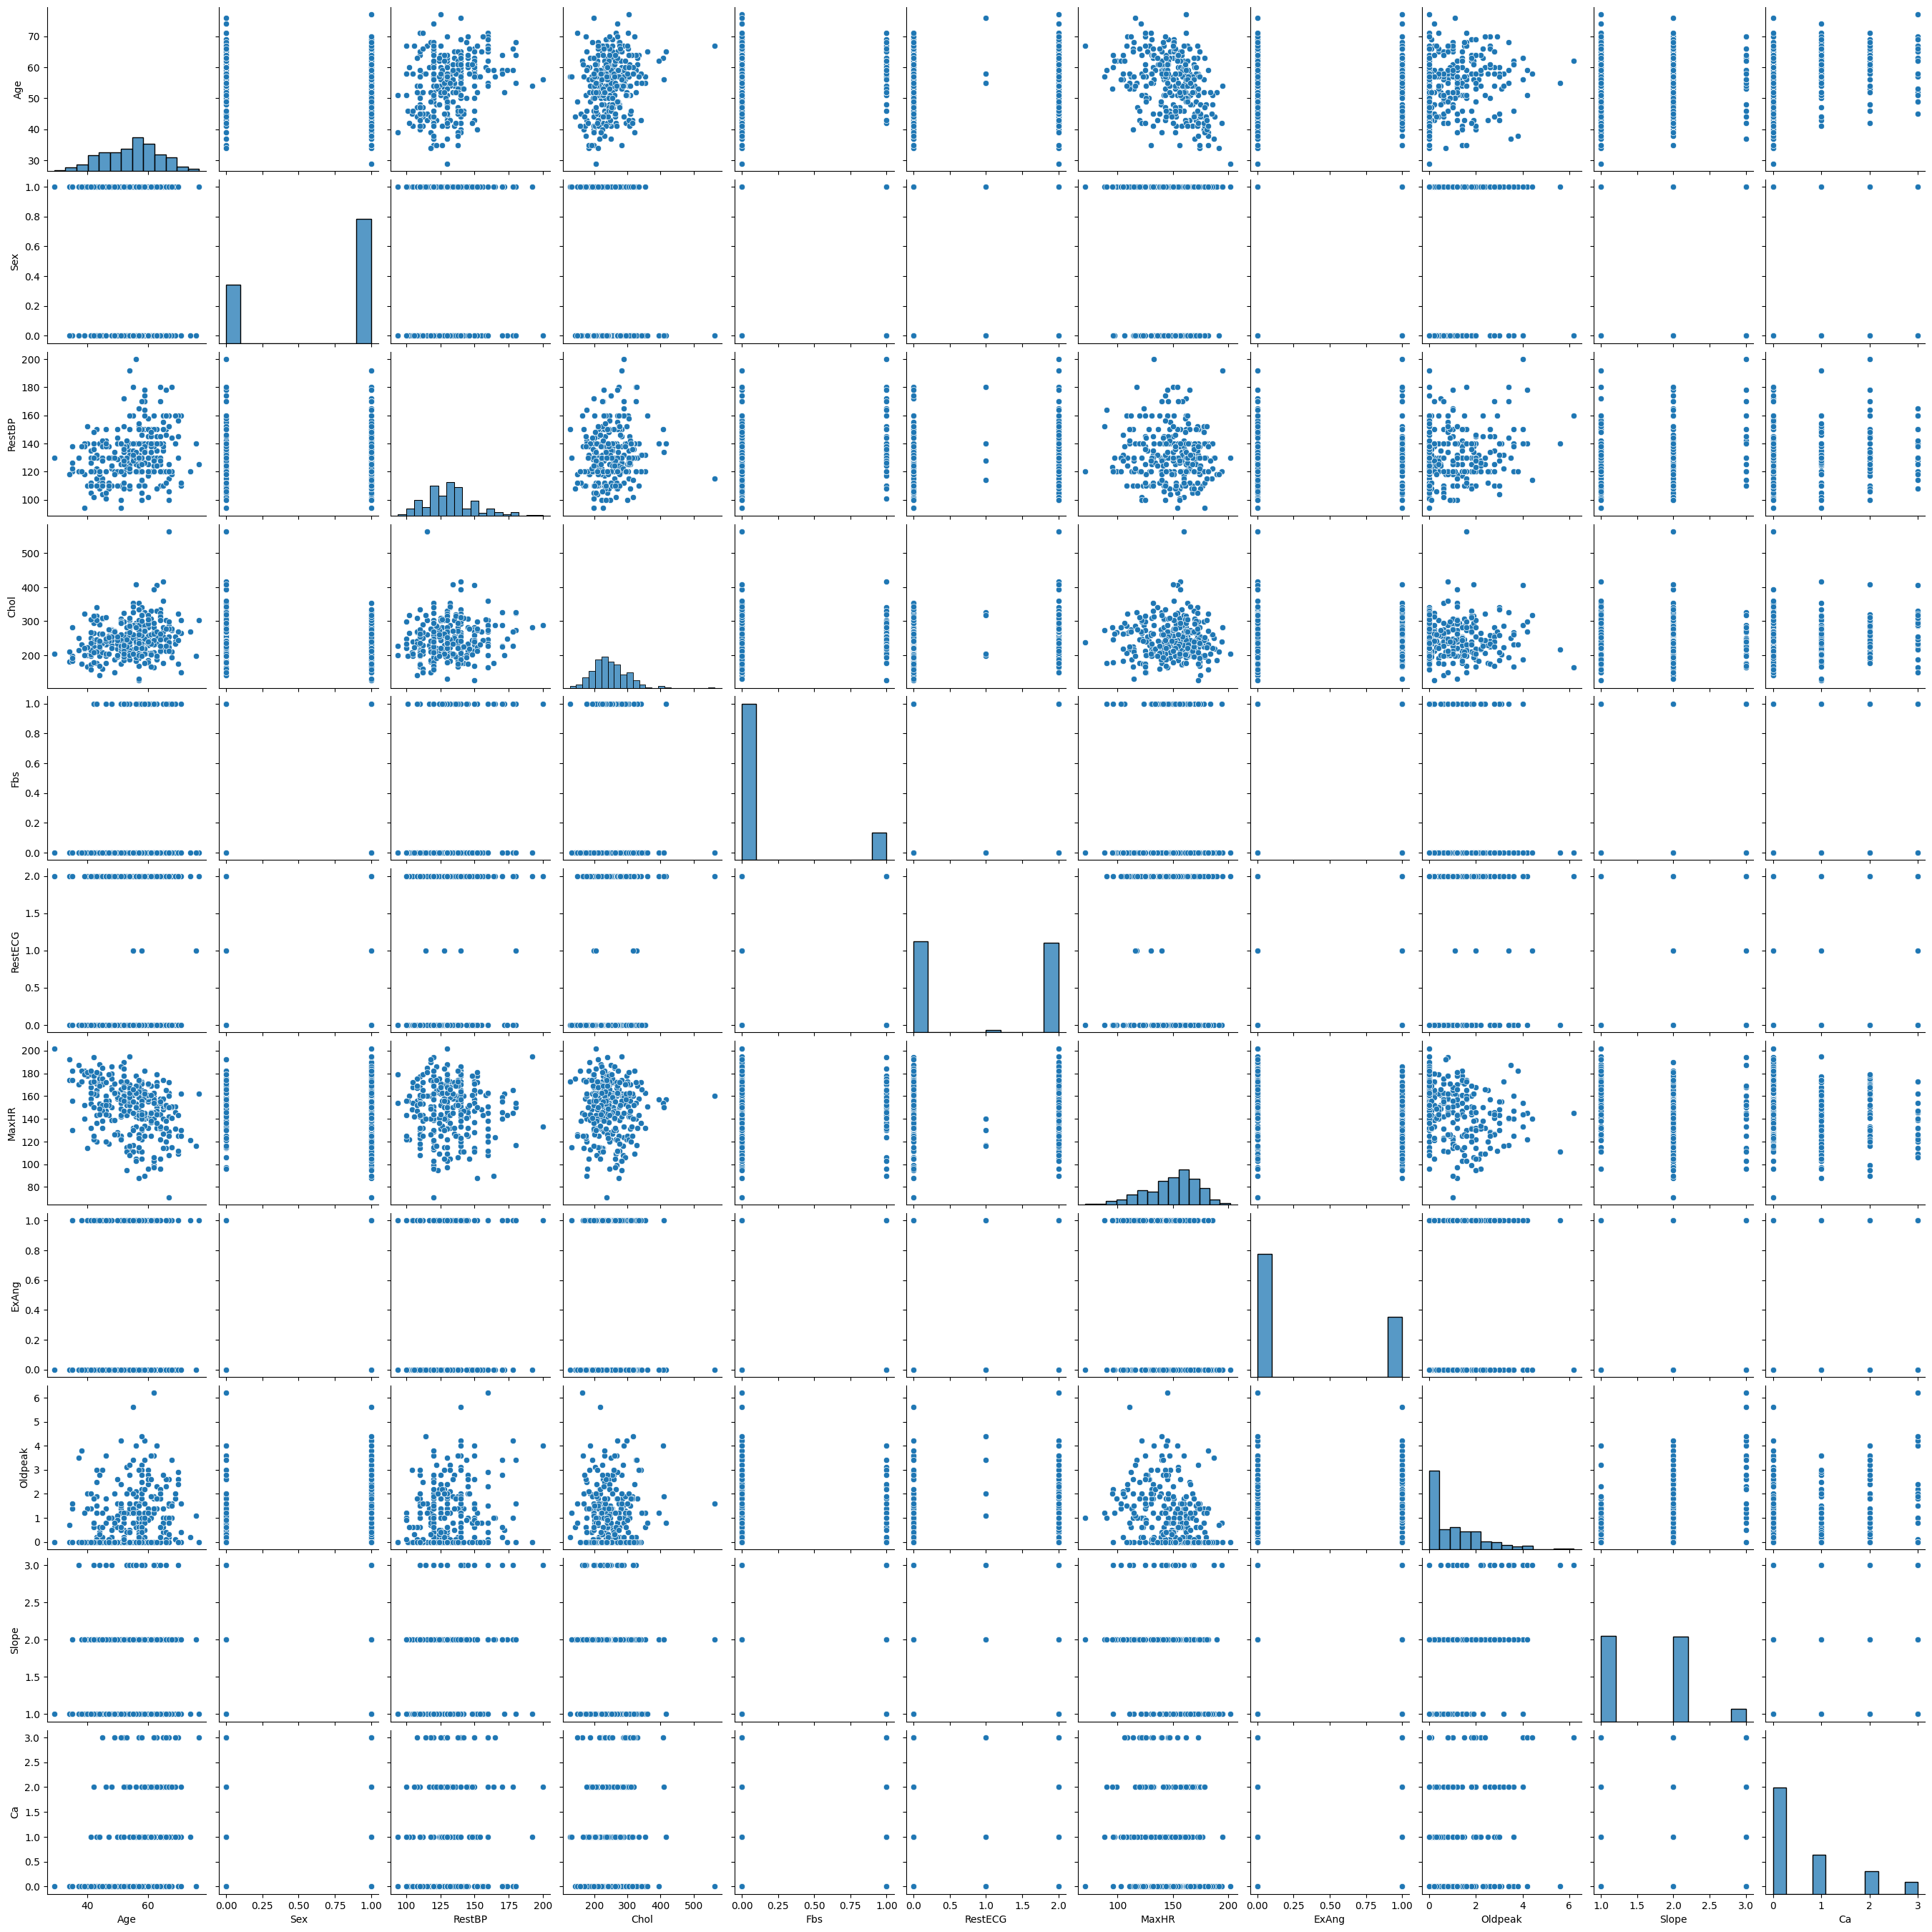

In [ ]:
sns.pairplot(data)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [ ]:
data.shape

(297, 14)

In [ ]:
# Dictionary Method
new_columns_dict = {
    'Age': 'age',
    'Sex': 'sex_male',
    'ChestPain': 'chest_pain',
    'RestBP': 'resting_blood_pressure',
    'Chol': 'cholesterol',
    'Fbs': 'fasting_blood_sugar',
    'RestECG': 'resting_ecg',
    'MaxHR': 'max_heart_rate',
    'ExAng': 'exercise_induced_angina',
    'Oldpeak': 'old_peak',
    'Slope': 'slope',
    'Ca': 'ca',
    'Thal': 'thallium_stress_test',
    'AHD': 'has_heart_disease',
}

data.rename(columns= new_columns_dict,inplace=True)

In [ ]:
# List Replacement Method
new_columns_list = [
    'age',
    'sex_male',
    'chest_pain',
    'resting_blood_pressure',
    'cholesterol',
    'fasting_blood_sugar',
    'resting_ecg',
    'max_heart_rate',
    'exercise_induced_angina',
    'old_peak',
    'slope',
    'ca',
    'thallium_stress_test',
    'has_heart_disease',
]

# df.columns = new_columns_list

In [ ]:
data.columns

Index(['age', 'sex_male', 'chest_pain', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'old_peak', 'slope', 'ca',
       'thallium_stress_test', 'has_heart_disease'],
      dtype='object')

In [ ]:
data.head()

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
data.describe()

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
data.groupby('has_heart_disease').mean().T

<ipython-input-21-f8b0a1a92bcf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('has_heart_disease').mean().T


has_heart_disease,No,Yes
age,52.64375,56.759124
sex_male,0.55625,0.817518
resting_blood_pressure,129.17500,134.635036
cholesterol,243.49375,251.854015
fasting_blood_sugar,0.14375,0.145985
resting_ecg,0.84375,1.175182
max_heart_rate,158.58125,139.109489
exercise_induced_angina,0.14375,0.540146
old_peak,0.59875,1.589051
slope,1.41250,1.824818


Plot variables with potential outliers using boxplots.

<Axes: >

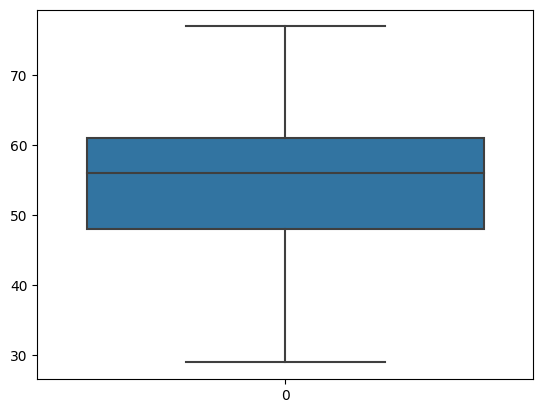

In [ ]:
# age

sns.boxplot(data.age)

In [ ]:
data.corr()

<ipython-input-23-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca
age,1.000000,-0.092399,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210
sex_male,-0.092399,1.000000,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925
resting_blood_pressure,0.290476,-0.066340,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954
cholesterol,0.202644,-0.198089,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945
fasting_blood_sugar,0.132062,0.038850,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086
resting_ecg,0.149917,0.033897,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021
max_heart_rate,-0.394563,-0.060496,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727
exercise_induced_angina,0.096489,0.143581,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232
old_peak,0.197123,0.106567,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452
slope,0.159405,0.033345,0.121172,-0.009215,0.047819,0.135141,-0.389307,0.250572,0.579037,1.000000,0.109761


<ipython-input-24-0232511f4a28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

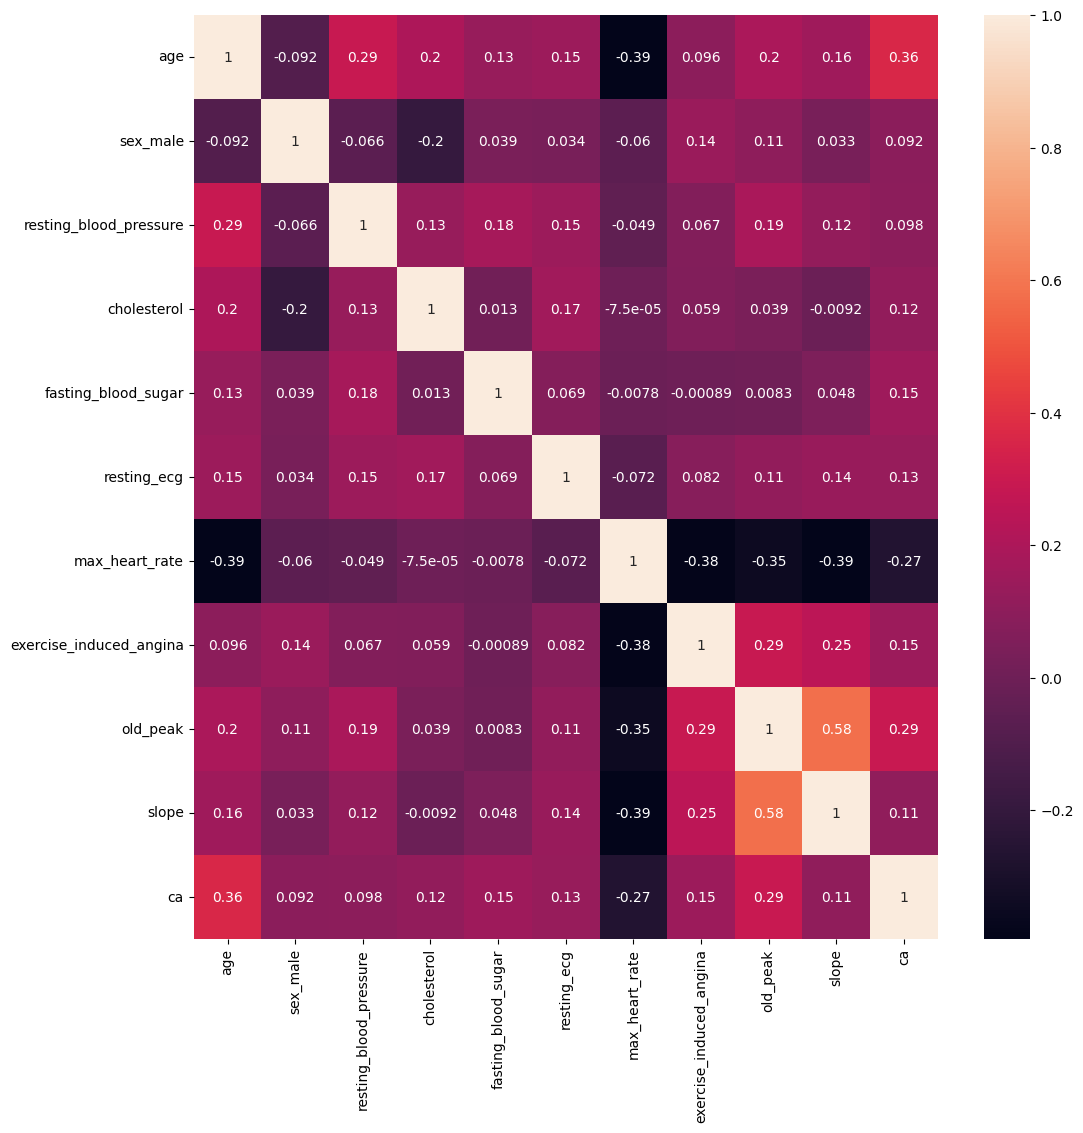

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.dtypes

age                          int64
sex_male                     int64
chest_pain                  object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate               int64
exercise_induced_angina      int64
old_peak                   float64
slope                        int64
ca                         float64
thallium_stress_test        object
has_heart_disease           object
dtype: object

In [ ]:
data["chest_pain"]=data["chest_pain"].astype("category")
data["chest_pain"]=data["chest_pain"].cat.codes

In [ ]:
data["thallium_stress_test"]=data["thallium_stress_test"].astype("category")
data["thallium_stress_test"]=data["thallium_stress_test"].cat.codes

In [ ]:
data["has_heart_disease"]=data["has_heart_disease"].astype("category")
data["has_heart_disease"]=data["has_heart_disease"].cat.codes

In [ ]:
data.head()

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [ ]:
data.shape

(297, 14)

In [ ]:
# Define X and y.
X = data.drop('has_heart_disease', axis = 'columns')
y = data['has_heart_disease']

In [ ]:
X

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [ ]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: has_heart_disease, Length: 297, dtype: int8

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(data)

In [ ]:
scaled_data

array([[ 0.93618065,  0.69109474,  2.24062879, ..., -0.72197605,
        -2.2712801 , -0.92533778],
       [ 1.3789285 ,  0.69109474, -0.87388018, ...,  2.47842525,
        -0.55917302,  1.08068645],
       [ 1.3789285 ,  0.69109474, -0.87388018, ...,  1.41162482,
         1.15293406,  1.08068645],
       ...,
       [ 1.48961547,  0.69109474, -0.87388018, ...,  1.41162482,
         1.15293406,  1.08068645],
       [ 0.27205887,  0.69109474, -0.87388018, ...,  0.34482438,
         1.15293406,  1.08068645],
       [ 0.27205887, -1.44697961,  1.20245913, ...,  0.34482438,
        -0.55917302,  1.08068645]])

In [ ]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(n_components=6)

In [59]:
pca.fit(scaled_data)

PCA(n_components=6)

In [60]:
x_pca=pca.transform(scaled_data)

In [61]:
scaled_data.shape

(297, 14)

In [62]:
x_pca.shape

(297, 6)

In [63]:
scaled_data

array([[ 0.93618065,  0.69109474,  2.24062879, ..., -0.72197605,
        -2.2712801 , -0.92533778],
       [ 1.3789285 ,  0.69109474, -0.87388018, ...,  2.47842525,
        -0.55917302,  1.08068645],
       [ 1.3789285 ,  0.69109474, -0.87388018, ...,  1.41162482,
         1.15293406,  1.08068645],
       ...,
       [ 1.48961547,  0.69109474, -0.87388018, ...,  1.41162482,
         1.15293406,  1.08068645],
       [ 0.27205887,  0.69109474, -0.87388018, ...,  0.34482438,
         1.15293406,  1.08068645],
       [ 0.27205887, -1.44697961,  1.20245913, ...,  0.34482438,
        -0.55917302,  1.08068645]])

In [64]:
x_pca

array([[-0.20337312,  2.35654262, -3.03405442,  2.84176418,  0.06412605,
         1.12248451],
       [ 3.65908933,  1.2099672 ,  0.29905314, -0.45680803,  0.65875057,
         0.87326156],
       [ 3.29177621, -0.70794148,  0.13000606, -0.38849238,  0.2179672 ,
         0.61449325],
       ...,
       [ 2.69761898,  0.41474958, -2.27072344, -0.19141483,  1.65831111,
        -1.45027911],
       [ 2.09393419, -2.341606  , -0.33002553,  0.41457074,  1.33125702,
        -0.68681227],
       [-0.64206382,  1.15664955,  0.08609859,  0.31210947, -0.42296098,
         0.68356622]])

Text(0, 0.5, 'Second principle component')

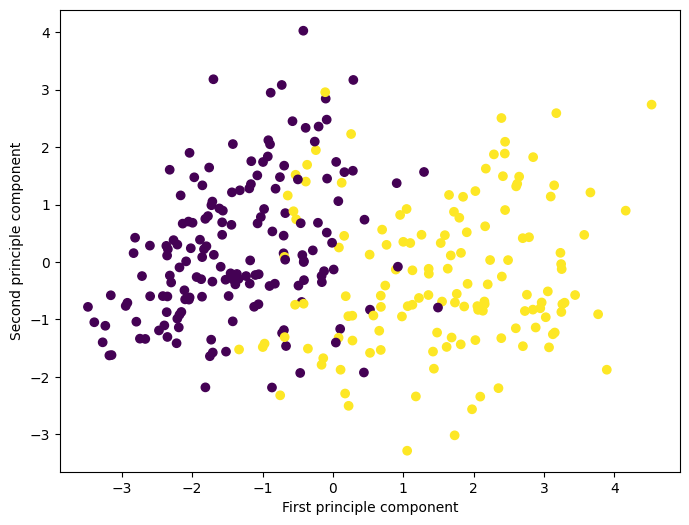

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['has_heart_disease'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [66]:
print(pca.explained_variance_ratio_)

[0.24427236 0.11432298 0.08581011 0.08424632 0.07296146 0.06688734]


In [67]:
print(pca.singular_values_)

[31.86980494 21.80263608 18.88910865 18.71620205 17.41762775 16.67685741]


In [68]:
from sklearn .model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [70]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
model.intercept_

array([-0.0862054])

In [72]:
model.coef_

array([[-0.03542425,  1.16474947, -0.42361281,  0.02339764,  0.0040893 ,
        -0.59690499,  0.2099107 , -0.03785959,  0.73617038,  0.3466884 ,
         0.2185169 ,  1.06436629,  1.01461401]])

In [73]:
model.score(X_train,y_train)

0.8396624472573839

In [74]:
model.score(X_test,y_test)

0.8333333333333334

In [75]:
y_pred=model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8333333333333334

##############  Apply PCA

In [78]:
# Feature scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [80]:
#apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [82]:
print(X_train.shape)
print(X_train_new.shape)

(237, 13)
(237, 13)


In [85]:
pca.explained_variance_ratio_

array([0.21761044, 0.12318498, 0.09659809, 0.08946542, 0.07751913,
       0.07375664, 0.06631039, 0.06114077, 0.05027899, 0.04412268,
       0.03855291, 0.03272991, 0.02872964])

In [91]:
#apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [92]:
print(X_train.shape)
print(X_train_new.shape)

(237, 13)
(237, 6)


In [93]:
pca.explained_variance_ratio_

array([0.21761044, 0.12318498, 0.09659809, 0.08946542, 0.07751913,
       0.07375664])

In [94]:
model.fit(X_train_new,y_train)

LogisticRegression()

In [95]:
y_pred_new=model.predict(X_test_new)

In [96]:
accuracy_score(y_test,y_pred_new)

0.8833333333333333

## For high diemension text data or Images dataset you can use loop

In [97]:
accuracy=[]
for i in range(1,13):
  pca=PCA(n_components=i)
  X_tr=pca.fit_transform(X_train)
  X_te=pca.transform(X_test)

  model.fit(X_tr,y_train)
  y_pred=model.predict(X_te)
  print(accuracy_score(y_test,y_pred))
  accuracy.append(accuracy_score(y_test,y_pred))

0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8833333333333333
0.8666666666666667
0.8666666666666667
0.8833333333333333
0.8333333333333334
0.8333333333333334
0.8666666666666667
